# Introduction

In [1]:
import ModelSearch
import pandas as pd 
import sys
import sbmlcore
import scipy
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis


/Users/dylanadlard/opt/anaconda3/envs/SABS_1_report_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Introduction

### Tuberculosis Remains One of the Largest Global Health Concerns

The growing incidence of *Mycobacterium tuberculosis* (Mtb) and its inexorable increase in antimicrobial resistance (AMR) poses one of the greats threats to global healthcare today. Tuberculosis is one of the leading causes of death from a single infectious agent ([WHO, 2022a](#WHO2022a)), with 10 million people contracting the disease in 2020 resulting in 1.3 million deaths in HIV-negative patients and an additional 214000 HIV-positive deaths ([WHO, 2021](#WHO2021); [WHO, 2022b](#WHO2022b)).

Owing to the Covid pandemic, the predicted outlook for TB incidence and mortality is bleak, with incidence expected to considerably increase from 2022 to 2023 ([WHO, 2021](#WHO2021) reversing a steady improvement prior to Covid ([WHO, 2020a](#WHO2022a)), as evidenced by an 18% decrease in new TB diagnoses between 2019 and 2020, from 7.1 million  to 5.8 million cases. The WHO cites reduced access to diagnosis and treatment as the primary cause for the increase, compounded by a 15% decrease in the number of patients treated for drug-resistant TB (DR-TB) from 2019-2020, and a drop in global spending on TB diagnosis, treatment, and prevention to less than half of that required to effectively combat the disease ([WHO, 2021](#WHO2021)).

In 2014, the WHO’s ‘End TB Strategy’ optimistically set a target of an 80% reduction in TB incidence and 90 percent reduction in TB deaths by 2030, with eradication of the disease by 2035 ([WHO, 2014](#WHO2014)), but largely due to AMR and the setbacks caused by Covid, these are unlikely to be met ([WHO, 2020a](#WHO2020a); [WHO, 2021](#WHO2021)), particularly with tuberculosis associated AMR steadily increasing.


### AMR Associated with tuberculosis is steadily increasing

The overuse of antimicrobials in clinical medicine, veterinary medicine, and agriculture serves to accelerate the global prevalence and evolution of AMR, which is further exacerbated by the slow rollout of new antibiotics ([Witzany et al, 2020](#Witzany2020)). Modelling suggests that by 2050 a quarter of the 10 million deaths annually predicted to be associated with AMR will derive from DR-TB ([O’Neil, 2014](#ONeil2014); ['O'Neil, 2016](#ONeil2016)). In 2019 a 3.3% increase in new DR-TB cases was recorded, with 17.7% of previously treated cases having either rifampicin-resistant TB (RR-TB) or multidrug-resistant TB (MDR-TB), defined as being resistant to rifampicin and at least one other first or second line drug. In the same year, half a million people developed RR-TB, of which 79% had MDR-TB ([WHO, 2020a](#WHO2020a). The latest estimate for the proportion of people newly diagnosed with TB found to have RR/MDR-TB is 3-4% rising to 18-21% for those previously treated for TB ([WHO, 2021](#WHO2021)).

The unaffordability and sometimes limited availability of appropriate drug regimens in developing countries are partly responsible for this increase in AMR, coupled with inadequate prior drug susceptibility testing (DST) which is a pre-requisite for effective drug selection. DST is often not available in the countries where TB is the most prevalent due to the requirement for expensive diagnostic equipment plus the technical expertise required to operate and maintain it. Owing to the slow growth rate of Mtb, conventional culture-based phenotypic testing typically takes several weeks to complete and requires stringent laboratory biosafety conditions ([WHO, 2020a](#WHO2020a)). Delays related to, or the total absence of MDR-TB diagnostic testing are associated with worse clinical outcomes and increased transmission ([Falzon et al, 2011](#Falzon2011)).

Drug susceptible TB is typically treated in adults with a standardised regimen consisting of an intensive phase of 2 months of the first line antibiotics; isoniazid, rifampicin, pyrazinamide, and ethambutol, followed by 4 months of isoniazid and rifampicin ([Nahid et al, 2016](#Nahid2016)). The evidence-based treatment for MDR/RR-TB and extensively resistant TB (XRD) ([Seung et al, 2015](#Seung2015)) recommends a 6-month regimen of the second-line antibiotics, bedaquiline, pretomanid, linezolid, and moxifloxacin as being sufficient to treat MDR/RR-TB patients who have no previous exposure to these medicines. However, prior drug susceptibility testing (DST) for fluoroquinolones, which include moxifloxacin,  is now encouraged, as resistance to such is often observed, and the WHO recently recommended removing them from such regimens ([WHO, 2022b](#WHO2022b)).

This report focuses on rifampicin and the mechanisms of resistance to such.

### Rifampicin occludes the mRNA extension channel

Rifampicin is a 1st line anti-tubercular compound that has been an integral component of standard rifampicin-susceptible regimens since the introduction of the 6-month regimen in the 1980s ([Sandgren et al, 2009](#Sandgren2009)). 

The drug binds RNA polymerase (RNAP) to inhibit transcription.

Prokaryotic transcription initiates with at least one transcription factor and RNAP binding the a promoter. The binding of RNAP and a sigma factor induces formation of a closed complex. A transcription bubble is then generated on promoter unwinding, and the catalytically active RNAP-promoter open complex forms ([Ruth M. Saecker, 2011](#Saecker2011)). 

Five subunits (a2bb'c) encoded by 4 genes (*rpoA, rpoB, rpoC, rpoD*, respectively) constitute the Mtb RNAP core complex:

<div></div>
<div></div>

<div>
<img src="images/RNAP_chains_1.png" alt="Drawing" style="width: 400px;"/>
--> rotate 180 degrees -->
<img src="images/RNAP_chains_2.png" alt="Drawing" style="width: 400px;"/>
<div></div>
Figure 1: Structure of RNA polymerase gene products: red= <i>rpoA</i>, orange= <i>rpoA</i> , green=<i>rpoB</i>, blue=<i>rpoC</i>, yellow=<i>rpoD</i>, purple=sigma factor A.
</div>       

<div></div>
<div></div>
       
     
The Mtb Rpo core is structurally similar to that of the Thermus thermophilus’ Rpo solved in 2012 ([Yu Zhang et al, 2012](#Zhang2012); [Lin et al, 2017](#Lin2017)).

Rifampicin sterically inhibits transcription by preventing the extension of 2- to 3- mRNA within the primary RNA extension channel ([Lin et al, 2017](#Lin2017))  (Figure 2). Crucially, RFP does not bind directly in the centre of the active site, but further along the mRNA extension channel. Synthesis of the first and second phosphodiester bonds occurs in the presence of RFP, and therefore the drug does not inhibit substrate binding, nor does it inhibit catalytic activity, nor intrinsic translocation mechanisms of the enzyme. RFP also has no effect on promoter binding and open complex formation ([McClure & Cech, 1978](#McClure1978); [Campbell et al, 2001](#Campbell2001)). Rifampicin directly occludes the extension of mRNA, and in its presence, the 5’ nucleotide of 3-nt mRNA remains unpaired and is rotated by 40 degrees due to the steric clash ([Lin et al, 2017](#Lin2017)).

<div></div>
<div></div>

<div>
<img src="images/Mechanism.png" alt="Drawing" style="width: 1000px;"/>
<div></div>
Figure 2: Rifampicin sterically occludes the mRNA extension channel. Green = sense/antisense DNA strands, blue = 2 nucleotides of mRNA, red = rifampicin bound.
</div>       

<div></div>


### Current Assays for the rapid detection of rifampicin resistance

It is therefore critical to be able to rapidly and accurately determine a clinical isolate's susceptiblity to rifampicin when choosing the most effective treatment regimen.

Mutations that are clinically associated with antimicrobial resistance largely exist in a well-delineated region of the *rpoB* gene; the 'rifampicin resistance determining region' (RRDR) ([Zhang & Yew, 2015](#Zhang2015)). The clustering of single nucleotide polymorphisms (SNPs) in the RRDR has enabled the relatively successful development of line-probe and cartridge-based molecular assays.

Rapid molecular tests that have been approved by the WHO have been developed, such as the Xpert® MTB/RIF and Xpert® MTB/RIF-Ultra (Xpert-Ultra) cartridge-based assays that detect resistance from sputum ([Boehme et al, 2010](#Boehme2010); [Steingart et al, 2014](#Steingart2014); [WHO, 2013](#WHO2013)). The *rpoB* gene is flanked by Mtb-specific sequences, which allows Xpert to target the RRDR of the wild-type, rifampicin sensitive *rpoB* gene and detect Mtb and rifampicin simultaneously using a single rt-PCR-generated amplicon. Fluorphore-labelled probes that bind to overlapping regions of the RRDR and flanking sequences facilitate sequence-detection ([Tyagi & Kramer, 1996](#Tyagi1996); [Tyagi et al, 1998](#Tyagi1998); [Piatek et al, 1998](#Piatek1998); [Piatek et al, 2000](#Piatek2000)). 

Xpert-Ultra was developed to solve Xpert MTB/RIF’s low sensitivity in patients with sputum smear negative or extra-pulmonary TB where TB can be harder to diagnose ([Sohn et al, 2014](#Sohn2014); [Lawn & Nicol, 2011](#Lawn2011); [Nicol et al, 2011](#Nicol2011)). However, Xpert MTB/RIF and Expert-Ultra only target rifampicin resistance, and if positive, further drug susceptibility profiling is carried out ([WHO, 2020b](#WHO2020b)). As these assays only target known mutations in hotspot regions of relevant genes, false negative results can occur when peripheral mutations in the same gene arise, and false negative predictions when targeting resistance lead to poor clinical outcome with often fatal consequences ([Zetola et al, 2014](#Zetola2014)). In addition, Xpert and Xpert-Ultra have low coverage for the other 1st and 2nd line drugs ([WHO, 2020a](#WHO2020a)).

Modelling predicts that after six years the introduction of more broadly effective and accurate diagnostic testing alone would result in a decrease in mortality of 29%, whilst the introduction of both diagnostic and new treatment regimens would reduce mortality by 56% compared to the current trend ([O’Neil, 2014](#ONeil2014), [O'Neil, 2016](#ONeil2014)).

It's important to note that any diagnostic software that may result from the wider project would be used in parallel with culture-based tests if resistance is predicted.

### Structural biology can be used to predict rifampicin resistance

There is therefore a compelling incentive to predict rifampicin resistance by analysing the effect of mutations throughout the entire *rpoB* gene sequence. This study contributes to a larger structural modelling project that attempts to address the limitations in sensitivity that current rapid diagnostic methods experience. We also hope to accurately predict the effect unforeseen mutations will have on susceptiblity. 

Although many researchers are using genetic features to predict resistance against rifampicin ([CRyPTIC, 2021](#CRyPTIC2021); [Feuerriegel et al., 2015](#Feuerriegel2015); [Johnsen et al., 2019](#Feuerriegel2015)), we have previously hypothesised and demonstrated that machine-learning models built on structural and biophysical features of RNA polymerase, as well as changes in biochemical parameters associated with each SNP, can robustly and accurately predict the effect of missense mutations on rifampicin susceptibility. It is important to note that these models predict susceptibility as opposed to resistance to determine whether a particular infection can be treated by the standard drug regimen, or whether the sample requires further susceptibility profiling, as these are the pertinent questions for the attending physician.

Previous proof of concept work focussed on determining whether structural features can be trained with clinical mutation data to predict rifampicin susceptibility.

In this study, we build on this previous work to not only develop robust, sustainable software that pulls down structural features from static pdb structures, but we also added classes to a Python package to pull down features from molecular dynamics trajectories to act as additional training features. We subsequently built a Python class that rapidly searches over any machine-learning model, any number of input dataframes, and performs grid searches and variable up-sampling to automatically determine the most effective model, feature set, and tuned parameters. Finally, rather than compiling a dataset containing isolates with single SNPs in RNAP, we attempt to remove inherent bias in the data and compile a set focussing on *rpoB* that contains different mutations only (explained further in Methods).

The models were trained on a dataset containing 307 SNPs in the *rpoB* gene, collected by the Comprehensive Resistance Prediction for Tuberculosis: an International Consortium (CRyPTIC) project, whose data contributes to the first WHO-endorsed genetic catalogue of clinically sampled Mtb isolates ([Brankin et al, 2021b](#Brankin2021b); [Walker et al, 2022](#Walker2022)). The models are built on the assumption that each resistance-conferring mutation perturbs rifampicin binding to RNA polymerase, either via altering folding or stability of the protein, or by altering the non-covalent interactions between rifampicin and residues of its binding pocket. Solo SNPs (defined here as SNPs that occur in isolation, with the sample containing no other mutations in that particular protein) were focussed on due to their relatively uncomplicated, direct single mutation-phenotype relationship.

The machine learning class I wrote can currently train four different classification models (logistic regression, linear SVM, decision tree, and random forest) with hyperparameter tuning and up-sampling to optimise specificity and sensitivity by maximising precision at minimal detriment of recall. The best performing model and its feature importance plots are analysed to understand the biophysical and structural foundations on which the optimal model is built. 

A primary aim of this study is testing the hypothesis that adding features that include a measure of the protein dynamics into the feature set will improve the performance of the machine learning models.



# Methods and Results

### Data Processing Workflow

The pipeline below (Figure 3) first trains models on binary phenotype results as labels (resistance vs susceptible) and leads to a prediction of a binary phenotype. This pipeline requires the pulldown of structural, biochemical, thermodynamic, and evolutionary features from RNAP and its mutations before merging these with filtered, prepared mutation data. These data and that for the filtered, prepared phenotype readouts form the feature sets and target labels, respectively. 

The data is split into 70:30 training and test sets, the former of which undergoes a parameter grid search with cross validation and upsampling (discussed later). The model is retrained using the best parameters, and a classification report and confusion matrix is outputted post decision-threshold shifting to maximise specificity.

<div></div>


<div>
<img src="images/direct_binary_workflow.png" alt="Drawing" style="width: 700px;"/>
<div></div>
Figure 3: Workflow used in this study for the prediction of binary resistant/susceptible phenotypes using structural features as a feature set. All orange (apart from 'Filter data') and green boxes are handled by the sbmlcore suite of classes and the SearchModels() class. 
</div>       

<div></div>


## Target Set Derivation

### Mutation data derivation

The data that formed the labels and much of the training sets were derived from the CRyPTIC database. Mutation data was extracted from Illumina platform WGS of clinical isolates. Since this study focuses on predicting susceptiblity in response to solo structural SNPs in Mtb RNA polymerase, mutations associated with other drug targets, non-solo mutations, phylogenetic, and synonymous mutations were filtered out, as well as insertion/deletion polymorphisms (indels), and mutations in the promoter. 

Of particular note is the fact that mutations in the RRDR are reportedly responsible for more than 95% of resistance to rifampicin ([Mvelase, 2019](#Mvelase2019)); a statistic that is at least partially reflected in our data. Therefore, as this is a preliminary investigation, and for simplicity, only mutations located in *rpoB* are initially considered.

In [2]:
#read in CRyPTIC mutation data
mutation_df = pd.read_pickle('Data_tables/MUTATIONS-rnap.pkl.gz')
mutation_df.drop_duplicates(inplace=True)
#remove nulls and ensure mutation is a SNP

mutation_df = mutation_df[(~mutation_df['IS_NULL']) & (mutation_df['IS_FILTER_PASS']) & (mutation_df['IS_SNP'])]
#ensure mutation is in the coding region
mutation_df = mutation_df[mutation_df['IN_CDS']]
#ensure mutations are non-synonymous
mutation_df = mutation_df[~mutation_df['IS_SYNONYMOUS']]
#only investigate mutations in rpoB
mutation_df = mutation_df.loc[mutation_df.GENE=='rpoB']
#only investigate solo mutations
mutation_df = mutation_df.drop_duplicates(subset=['UNIQUEID'], keep=False)
#insert segid column
mutation_df['segid'] = [i[-1] for i in mutation_df.GENE]
mutation_df.set_index('UNIQUEID',verify_integrity=True, inplace=True)
mutation_df[:3]

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,segid
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.02.subj.1033.lab.2013185075.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,False,...,False,True,GENE,AAM,NaN,,,02,1,B
site.02.subj.0739.lab.2013221518.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,False,...,False,True,GENE,AAM,NaN,,,02,1,B
site.02.subj.0604.lab.241032-14.iso.1,rpoB,M587I,587.0,587.0,NaN,NaN,atg,ata,True,False,...,False,True,GENE,AAM,NaN,,,02,1,B


### Phenotype data derivation

Primary phenotypic data were Minimum Inhibitory Concentrations (MIC) read from bespoke CRyPTIC UKMYC5 and UKMYC6 susceptibility plates on which the same clinical isolates that underwent WGS were plated. Data was pooled from laboraties in 27 countries across 65 continents, and to date, the WHO-endoresed CRyPTIC dataset contains MICs of 15,211 isolates to 13 different anti-TB drugs ([Brankin et al, 2021b](#Brankin2021b); [Walker et al, 2022](#Walker2022)).
   
Each UKMYC5/6 96-well microtitre plate contained 13 different 1st and 2nd line anti-TB compounds, including rifampicin, as well as two repurposed drugs (linezolid and clofazimine) and two positive control wells. Plates were manufactured with the drugs freeze-dried onto each well following a doubling dilution series. After incubation for 14 days, MICs are read by a trained lab technician via either a Sensititre-Vizion Digital MIC viewing system or via a Mirrored Box ([Rancoita et al, 2018](#Rancoita2018)), and these are verified by an Automated Mycobacterial Growth Detection Algorithm (AMyGDA) ([Fowler et al, 2018](#Fowler2018); [Rancoita et al, 2018](#Rancoita2018)), as well as via a community science platform, BashTheBug. Phenotype readout disagreements between all three methods constituted low-quality phenotypes and were discarded for this study. 

The dataset contains a resistance vs susceptible binary phenotype determined directly from MICs (using a critical MIC Epidemiological Cut-off (ECOFF) value of 1.0 mg/L for rifampicin) that acts as the labels for binary classification models ([CRyPTIC, 2022](#CRyPTIC2022)).

In [3]:
phenotype_df = pd.read_pickle('Data_tables/DST_MEASUREMENTS-rifamycins.pkl.gz')
#filter out rifamycin
phenotype_df = phenotype_df.loc[phenotype_df.DRUG=='RIF']
phenotype_df.drop_duplicates(subset=["UNIQUEID"], keep="first", inplace=True)
#filter out rifamycin
phenotype_df.set_index('UNIQUEID',verify_integrity=True, inplace=True)
phenotype_df[:3]

,DRUG,PHENOTYPE,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC
UNIQUEID,,,,,,,,
site.06.subj.06TB_0290.lab.06MIL0881.iso.1,RIF,R,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.5,>4
site.05.subj.PMFR-0724.lab.MFR-199.iso.1,RIF,S,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.5,0.12
site.05.subj.PTAN-0168.lab.TAN-500.iso.1,RIF,S,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.5,<=0.06


### Merge phenotype and mutation dataframes

In [4]:
merged = mutation_df.join(phenotype_df[['PHENOTYPE']],how='inner')

merged[:3]

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,segid,PHENOTYPE
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.02.subj.1033.lab.2013185075.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,False,...,True,GENE,AAM,NaN,,,02,1,B,R
site.02.subj.0739.lab.2013221518.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,False,...,True,GENE,AAM,NaN,,,02,1,B,R
site.02.subj.0604.lab.241032-14.iso.1,rpoB,M587I,587.0,587.0,NaN,NaN,atg,ata,True,False,...,True,GENE,AAM,NaN,,,02,1,B,S


This dataframe now contains all isolates with the desired type of mutation in *rpoB* and corresponding binary resistance phenotype. However, the majority of these are isolates that have the same mutation, particulary S450L, as demonstrated below. Rather than building an unbiased model, training on this data would result in heavily weighting the model on the few most commonly observed mutations.

In [5]:
pd.DataFrame(merged['MUTATION'].value_counts())[:10]

,MUTATION
S450L,6013
D435V,777
H445D,405
H445Y,341
L452P,150
L430P,143
S450W,138
H445L,138
D435Y,119
I491F,110


To account for this, all data were 'compressed' so that rather than training on isolates (which in total would contain may repeats of the same mutations), the models were trained on unique mutations. A complication, however, arises from the fact many mutations do not consistently result in the same phenotype. To address this, a threshold of 0.5 was set (as although there is inconsistency, on the large the resistance/susceptible classification is fairly clear), whereby mutations that are observed three or more times are classified as their majority phenotype, while mutations that occur at least once and less than 3 times are classified as resistant or susceptible if all phenotypes are observed to be either resistant or suscpetible, respectively. 

In [6]:
#create a crosstab df to calculate the number (and total) of phenotypes per mutation
ct = pd.crosstab([merged.MUTATION, merged.segid], merged.PHENOTYPE)
ct['total'] = ct['R'] + ct['S']
ct['prob_R'] = ct['R']/ct['total']
ct['prob_S'] = ct['S']/ct['total']

ct.sort_values(by='total',ascending=False)

def calculate_RS(row):
    #determine majority phenotype
    phenotype='U'
    if row['total'] >= 3:
        if row['prob_R'] > 0.5:
            phenotype='R'
        elif row['prob_S'] > 0.5:
            phenotype='S'
    elif row['total'] >=1:
        if row['R'] == row['total']:
            phenotype='R'
        elif row['S'] == row['total']:
            phenotype='S'

    return phenotype

#determine majority phenotype with calculate_RS()
ct['PHENOTYPE'] = ct.apply(calculate_RS, axis=1)
#filter for mutations that contain a majority phenotype
ct = ct[ct['PHENOTYPE'].isin(['R','S'])]

ct.reset_index(inplace=True, level = ['segid'])
ct[:3]

PHENOTYPE,segid,I,R,S,U,total,prob_R,prob_S,PHENOTYPE
MUTATION,,,,,,,,,
A1002P,B,0,0,3,0,3,0.0,1.0,S
A286V,B,0,2,0,0,2,1.0,0.0,R
A29T,B,0,0,1,0,1,0.0,1.0,S


In [7]:
#create the final dataframe, phenotypes for which have been determined by crosstab

mutation = [i for i in ct.index]
index = [i for i in range(0, len(ct))]
#chain id is changed to match pdb numbering (B --> C)
segid = 'C'
phenotype = [i for i in ct.PHENOTYPE]
df = pd.DataFrame({'mutation':mutation, 'segid':segid, 'phenotype':phenotype}, index=index)

#remove residues that don't exist in the pdb
df['resids'] = [int(i[1:-1]) for i in df['mutation']]
df = df[(df['resids']>=22) & (df['resids']<=1147)]
df.drop(labels='resids', axis=1, inplace=True)
df[:5]


,mutation,segid,phenotype
0,A1002P,C,S
1,A286V,C,R
2,A29T,C,S
3,A29V,C,S
4,A334D,C,S


The derivation of this dataframe allows us to map mutation locations onto the structure of RNA polymerase:

<div></div>
<div></div>

<div>
<img src="images/r_locs.png" alt="Drawing" style="width: 450px;"/>
<img src="images/mut_locs.png" alt="Drawing" style="width: 450px;"/>
<div></div>
Figure 4: Locations of RNAP residues in <i>rpoB</i> with observed mutations : red = resistant mutations, orange = resistant and susceptible mutations have been observed, green = susceptible mutations, grey = <i>rpoB</i>, white = RNAP. One should note these images do not give any indication of prevalence or frequency.
</div>       

<div></div>

The crystal structure of Mtb RNAP used in this study, as well as the structure from which trajectories were previously built, was solved to 3.8Å ([Lin et al, 2017](#Lin2017)). Relevant structural features include a bound DNA-mimicking nucleic acid scaffold, a synthetic RNA oligomer corresponding to a 2-nt mRNA product, a bound rifampicin molecule, and σA responsible for binding the holoenzyme and modulating transcription initiation.

All in-silico structural feature pulldowns were performed using a suite of classes, termed `sbmlcore` (https://github.com/fowler-lab/sbmlcore); the development of which constituted a large component of the project, and the application of which is demonstrated below. The software has been packaged and registered on PyPI, and therefore is pip installable. My contribution to the software were the classes `sbmlcore.TrajectoryDistances()`, `sbmlcore.TrajectoryDihedrals()`, and their associated pytests.

The mutation dataframe is imported into sbmlcore via sbmlcore.FeatureDataset.

Each class is then instantiated with desired input parameters and the output can be appended to a feature set using a public method within the class. Therefore, a user can add a new strucutral feature to the feature set within 2 lines of code, thereby allowing for a streamlined pipeline with rapid construction of a dataframe ready to be split for machine learning. One can also instantiate multiple classes and add all outputs to the feature dataframe at once.

Selected mutations-specific biochemical differences include changes in volume, molecular weight, hydropathy and isoelectric point; all of which are readily calculated from predefined published values ([Zamyatnin, 1972](#Zamyatnin1972); [Lide, 1991](#Lide1991)). There are 2 different hydropathy scales ([Kyte and Doolittle, 1982](#Kyte1982); [Wimley and White, 1996](#Wimley1996)).

These site-specific biocheimcal alterations are included in the study based on the hypothesis that mutations can have profound consequences on rifampicin binding, particularly if that residue exists in the RRDR, protrudes into the rifampicin binding pocket, or direclty interacts with rifampicin. Increases in volume or molecular weight, for example, could sterically displace rifampicin, while changes in isoelectric point could perturb the electrostaic field within the binding site.

In [8]:
features = sbmlcore.FeatureDataset(df, species='M. tuberculosis', gene='RpoB', protein='RNAP')

In [9]:
v = sbmlcore.AminoAcidVolumeChange()
hk = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
hw = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
mw = sbmlcore.AminoAcidMWChange()
pi = sbmlcore.AminoAcidPiChange()

features.add_feature([v, hk, hw, mw, pi])

features.df[:3]

,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi
0,A334D,C,S,22.5,-5.3,2.08,44.0,-3.23
1,A960E,C,S,49.8,-5.3,1.28,58.0,-2.78
2,A498G,C,S,-28.5,-2.2,0.81,-14.0,-0.03


`DeepDDG` ([Cao et al, 2019](#Cao2019)) was used to predict extent of physiochemical perturbation in stability introducted by each mutation. This is implemented in sbmlcore via the `DeepDDG` class. `Snap2` ([Bromberg and Rost, 2007](#Bromberg2007); [Hecht et al, 2013](#Hecht2013), [2015](#Hecht2015)), which uses a neural network based model to predict changes in functionality, has been implemented in a class in `ExternalCode.py`, and can be used by calling `sbmlcore.SNAP2`. 

Secondary structure was determined with the Stride Web Interface([Heinig and Frishman, 2004](#Heinig2004)), which utilises hydrogen bond energy and statistically derived backbone torsion angle information calculated from the static pdb file. Stride also outputs phi and psi torsion angles. The Stride class in `ExternalCode.py` runs the Stride software and handles necessary data processing, such as converting secondary structure labels to one-hot encoded labels.

Solvent accessible surface area (sasa) for each residue was determined with `FreeSASA` ([Mitternacht, 2016](#Mitternacht2016)), a python module that can calculate sasa directly from a pdb file. This has been implemented as a class in `ExternalCode.py`; `FreeSASA`. An intuitive addition to this class would include building in a method that uses sasa and a specficied surface area threshold to defined surface residue, which would allow subsequent calculation of depth for every residue in the protein. It should be noted that Stride also outputs sasa values for each residue, however these are different from those calculated by FreeSASA, therefore it would be logical to build models with either and determine which, if any, results in greater performance.


In [10]:
ddg = sbmlcore.DeepDDG('Data_tables/5uh6-protein-chains.ddg', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
st = sbmlcore.Stride('Structural_files/5uh6.pdb', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
snp = sbmlcore.SNAP2('Data_tables/rpob_snap2.csv', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
sasa = sbmlcore.FreeSASA('Structural_files/5uh6.pdb')

features.add_feature([ddg, st, snp, sasa])

features.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,deep_ddG,secondary_structure,...,B,C,E,G,H,T,Predicted Effect,Score,Expected Accuracy,SASA
0,C,A1002P,S,24.1,-3.4,-0.64,26.0,0.30,-2.927,E,...,0,0,1,0,0,0,effect,36,66%,0.0
1,C,L1004I,S,0.0,0.7,-0.12,0.0,0.04,-1.033,C,...,0,1,0,0,0,0,effect,4,53%,0.0
2,C,F1005V,S,-49.9,1.4,0.05,-48.1,0.48,-1.007,B,...,1,0,0,0,0,0,effect,56,75%,0.0


A strucutral feature that we hypothesise will be of particular feature importance, especially with regard to RNA polymerase where resistance conferring mutations are y clustered, is distance. Therefore a class called `StructuralDistances` has been built that uses MDAnalysis to calculate the atomic distance between a specified reference structure, and every alpha carbon in the protein from the pdb file. Below, distances to magnesium and zinc ions, as well as rifampicin have been outputted.

In [11]:
rfp = sbmlcore.StructuralDistances('Structural_files/5uh6.pdb', distance_selection='resname RFP', distance_name='RFP_distances', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
zn1 = sbmlcore.StructuralDistances('Structural_files/5uh6.pdb', distance_selection='index 26082', distance_name='ZN1_distances', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
zn2= sbmlcore.StructuralDistances('Structural_files/5uh6.pdb', distance_selection='index 26083', distance_name='ZN2_distances', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})
mg = sbmlcore.StructuralDistances('Structural_files/5uh6.pdb', distance_selection='resname MG', distance_name='MG_distances', offsets={'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0})

features.add_feature([rfp, zn1, zn2, mg])

features.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,deep_ddG,secondary_structure,...,H,T,Predicted Effect,Score,Expected Accuracy,SASA,RFP_distances,ZN1_distances,ZN2_distances,MG_distances
0,C,N24D,S,-3.0,0.0,1.98,1.0,-2.64,-1.712,T,...,0,1,neutral,-58,78%,0.0,33.451542,79.570478,83.742025,39.250210
1,C,P27H,S,40.5,-1.6,1.68,40.1,1.29,-2.389,C,...,0,0,neutral,-46,72%,0.0,34.310065,83.670744,81.647322,42.756563
2,C,G28R,S,113.3,-4.1,-0.14,99.1,4.79,-0.840,C,...,0,0,neutral,-71,87%,0.0,36.383496,84.802095,82.959575,43.445721


All classes that have been showcased above calculate or run softaware on a single pdb file only, and therefore determine what we have termed 'static features' from a crystal structure. These were all developed by Dr Philip and Fowler Dr Charlotte Lynch with whom I am working closely. Although this report includes detailed analyses of models built on these features, all software below was built myself.  

Although a different data breakdown (and thus different machine learning input) was used, we can predict from preliminary studies that the static features pulled down thus far will result in a relatively good model when predicting rifampicin resistance. These models put a heavy weighting or importance on distance-related features, however, and they accordingly do not generalise to drug targets where the resistance conferring mutations are not clustered , such as in EmbB, ethambutol's target.

Therefore, a significant component of my project has been the development of classes that pull down features from trajectories with the aim of running proof of concept models to determine how well these 'dynamic features' perform, and if they result in the same (or hopefully higher) specificity and sensitivity than only using static features. 

As well as being able to make comparisons and potentially boost generalisability, using trajectories additionally allows one to derive features specific to simulations that can't be pulled from static structures, such as root mean sqaure fluctuation and other metrics of flexibility (to be integrated into sbmlcore at a later date).

We have been utilising three previously built 50ns (500 frames of 100ps) GROMACS simulations of RNA polymerase at 310K, 1 bar (to reproduce physiological conditions), and in solution with sodium ions, with a 14-base stretch of bound DNA, 2 RNA nucleotdies, 2 zinc ions, a magnesium ion, and with rifampicin bound. However, due to Git's file size constraints, for this report the xtc files have been downsampled to 50 frames of 1ns. This marginally affects model outputs, however the differences are minor and do not alter the conclusions of the report.  The simulations are based on the same pdb file used thus far. Philip Fowler ran the simulations, and therefore details pertaining to how they were run is out of scope for this report ([Brankin A, Folwer P, 2021](#Brankin2021a)).

The class `TrajectoryDistances` was developed to calculate specified distances across all frames and any number of input simulations. As a result of searching over 500 x 3 frames, rather than searching over what is a effectively a single frame, this class has to have a much higher degree of inherent flexiblity, and therefore a greater number of input parameters are required.

The class takes a list of any number of trajectories, as well as the trajectory structure file and the original pdb file. Distances are calculated between every alpha carbon and a reference atom group across all frames of each trajectory and are appended to form a 1500 (total number of frames) x 3263 (number of residues) two dimensional array of distances. Therefore, the three trajectories are essentially concatenated to one another. An alternative approach is to calculate distances in each trajectory seperately, and then average over corresponding frames to create an array of shape 500 (number of averaged frames) x 3263. The first approach was taken as the simulations will independently explore different paths, and its difficult to envisage any benefit of merging these paths (however, the validity of this decision can be explore in further studies).

The class then calculates a specified distance metric (mean, maximum, minimum, and median) across all frames of each residue to generate a 1 dimensional array of distances (one distance per residue). Although mean distance is perhaps the most intuitive choice of metric, if the mechansim of resistance is steric inhibition of drug binding, as demonstrated by RNA polymerase, there is an argument to be made that minimum distance to rifampicin could inform the model as to which residue side chains have the ability to phsyically sample that inhibitory space. 

As with a number of classes above, one can defined offsets, which simply allow the user to alter residue numbering for each chain to match that of pdb numbering.

The class also contains functionality to discard the top and bottom 5% percentile distances. Large, seemingly random perurbations are sometimes observed for certain residues, and discarding these percentiles prevents skewing the distance arrays towards values that are unlikely to reflect in vivo dynamics. 

The user can also define a slice of the trajectories, as oppose to calculating distances for the entire simulation. This allows one to discard the first 10 frames, for example, where the simulation could be assumed to still be equilibrating. 

Below we calculate minimum distances to rifampicin, as well as the magnesium and zinc ions. All three simulations are utilised, percentile exclusion is set to True and all frames are included.

In [12]:
dyn_rfp = sbmlcore.TrajectoryDistances('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'resname RFP', 'min_RFP_distance', distance_type='min', offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)
dyn_mg = sbmlcore.TrajectoryDistances('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'resname MG', 'min_MG_distance', distance_type='min', offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)
dyn_zn1 = sbmlcore.TrajectoryDistances('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'index 26082', 'min_ZN1_distance', distance_type='min', offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)
dyn_zn2 = sbmlcore.TrajectoryDistances('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'index 26083', 'min_ZN2_distance', distance_type='min', offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)

features.add_feature([dyn_rfp, dyn_mg, dyn_zn1, dyn_zn2])


features.df[:3]

,segid,resid,mutation,phenotype,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,deep_ddG,...,Expected Accuracy,SASA,RFP_distances,ZN1_distances,ZN2_distances,MG_distances,min_RFP_distance,min_MG_distance,min_ZN1_distance,min_ZN2_distance
0,C,24,N24D,S,-3.0,0.0,1.98,1.0,-2.64,-1.712,...,78%,0.0,33.451542,79.570478,83.742025,39.250210,32.825760,40.087918,72.074058,70.886097
1,C,27,P27H,S,40.5,-1.6,1.68,40.1,1.29,-2.389,...,72%,0.0,34.310065,83.670744,81.647322,42.756563,31.046832,39.464771,70.849891,70.071433
2,C,28,G28R,S,113.3,-4.1,-0.14,99.1,4.79,-0.840,...,87%,0.0,36.383496,84.802095,82.959575,43.445721,31.268523,40.348028,70.562561,70.035791


As well as calculating distances from trajectories, we can also calculate dihedral angles; functionality that has been integrated into a class named `TrajectoryDihedrals`. Similarly to `TrajectoryDistances`, the user calls the class with a structure file, a list of trajectory files, and the pdb file. However, the type of dihedral angle also has to be specified (phi, psi, or omega). The metric (mean, min, max, or median) must also be defined, however whether these would most return the most logical values should be revisted, particularly for the omega angle which typically fluctuates between either exactly -180 or +180 degrees. Again, modifications can easily be made.

Here, one can define any offsets required, the starting time and ending times, as well as whether 5% percentiles should be discarded, although the actual implementation of these features differs somewhat from Trajectorydistances.

In some circumstances trajectory files may not contain all bond information, and therefore setting `add_bonds=True` runs an MDAnalysis bond prediction alogrithm to predict any remaining bonds. 

One should note that not all angles can be calculated for all residues, such as the omega angle for the final residue as it is only bonded to one another amino acid, for example. These exceptions are also observed for phi and psi angles, albeit pertaining to different residues. In such an instance, the angle is simply set to zero, which is not optimal and needs to be investigated further. 

Below, mean phi and psi angles are pulled down from the three simulations of RNAP, and the 5% percentile tails are excluded.

In [13]:
phi = sbmlcore.TrajectoryDihedrals('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc','Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'phi', 'mean_phi', angle_type='mean', add_bonds=True, offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)
psi = sbmlcore.TrajectoryDihedrals('Structural_files/rpob-5uh6-3-warm.gro', ['Structural_files/rpob-5uh6-3-md-1-50ns-dt1ns-nojump.xtc', 'Structural_files/rpob-5uh6-3-md-2-50ns-dt1ns-nojump.xtc','Structural_files/rpob-5uh6-3-md-3-50ns-dt1ns-nojump.xtc'], 'Structural_files/5uh6.pdb', 'psi', 'mean_psi', angle_type='mean', add_bonds=True, offsets = {'A':0, 'B':0, 'C':-6, 'D':0, 'E':0, 'F':0}, percentile_exclusion=True)

features.add_feature([phi, psi])


In [14]:
#create numeric binary phenotypes
# 1 = susceptibility (as this is really what we're predicting)
# 0 = resistant
df = features.df

List = []
for i in df['phenotype']:
    if i == 'R':
        List.append(0)
    else:
        List.append(1)
df['BF'] = List
df

#filter out unwanted outputs to create a feature and target set
ML_df = df[['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_MW', 'd_Pi', 'deep_ddG', 'phi', 'psi', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA', 'RFP_distances', 'ZN1_distances', 'ZN2_distances', 'MG_distances', 'min_RFP_distance', 'min_MG_distance', 'min_ZN1_distance', 'min_ZN2_distance', 'mean_phi', 'mean_psi', 'BF']] 

ML_df[:3]

,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,deep_ddG,phi,psi,B,C,...,ZN1_distances,ZN2_distances,MG_distances,min_RFP_distance,min_MG_distance,min_ZN1_distance,min_ZN2_distance,mean_phi,mean_psi,BF
0,-3.0,0.0,1.98,1.0,-2.64,-1.712,-105.94,85.76,0,0,...,79.570478,83.742025,39.250210,32.825760,40.087918,72.074058,70.886097,-89.776782,135.158450,1
1,40.5,-1.6,1.68,40.1,1.29,-2.389,-87.22,-61.79,0,1,...,83.670744,81.647322,42.756563,31.046832,39.464771,70.849891,70.071433,-68.241710,5.762597,1
2,113.3,-4.1,-0.14,99.1,4.79,-0.840,153.53,37.39,0,1,...,84.802095,82.959575,43.445721,31.268523,40.348028,70.562561,70.035791,64.295017,-5.293784,1


In [15]:
ML_df.columns

Index(['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_MW', 'd_Pi',
       'deep_ddG', 'phi', 'psi', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA',
       'RFP_distances', 'ZN1_distances', 'ZN2_distances', 'MG_distances',
       'min_RFP_distance', 'min_MG_distance', 'min_ZN1_distance',
       'min_ZN2_distance', 'mean_phi', 'mean_psi', 'BF'],
      dtype='object')

## The Machine Learning Models

### Defining the different input dataframes

The primary aims of this analysis are to not only practically test the software that has been developed, but to also compare models built using static features and dynamic features.

Therefore, we accordingly define two input sets for each group of features

In [16]:
all_static = ML_df[['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_MW', 'd_Pi', 'deep_ddG', 'phi', 'psi', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA', 'RFP_distances', 'ZN1_distances', 'ZN2_distances', 'MG_distances', 'BF']]
all_dynamic = ML_df[['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_MW', 'd_Pi','deep_ddG', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA','min_RFP_distance', 'min_MG_distance', 'min_ZN1_distance', 'min_ZN2_distance', 'mean_phi', 'mean_psi', 'BF' ]] 


#### Some features appear confounded

Data generated from previous studies alluded to a possible reduced performance as a result of certain features displaying a linear relationship when plotted against one another.

To investigate this further we can generate a scatter matrix with pandas.

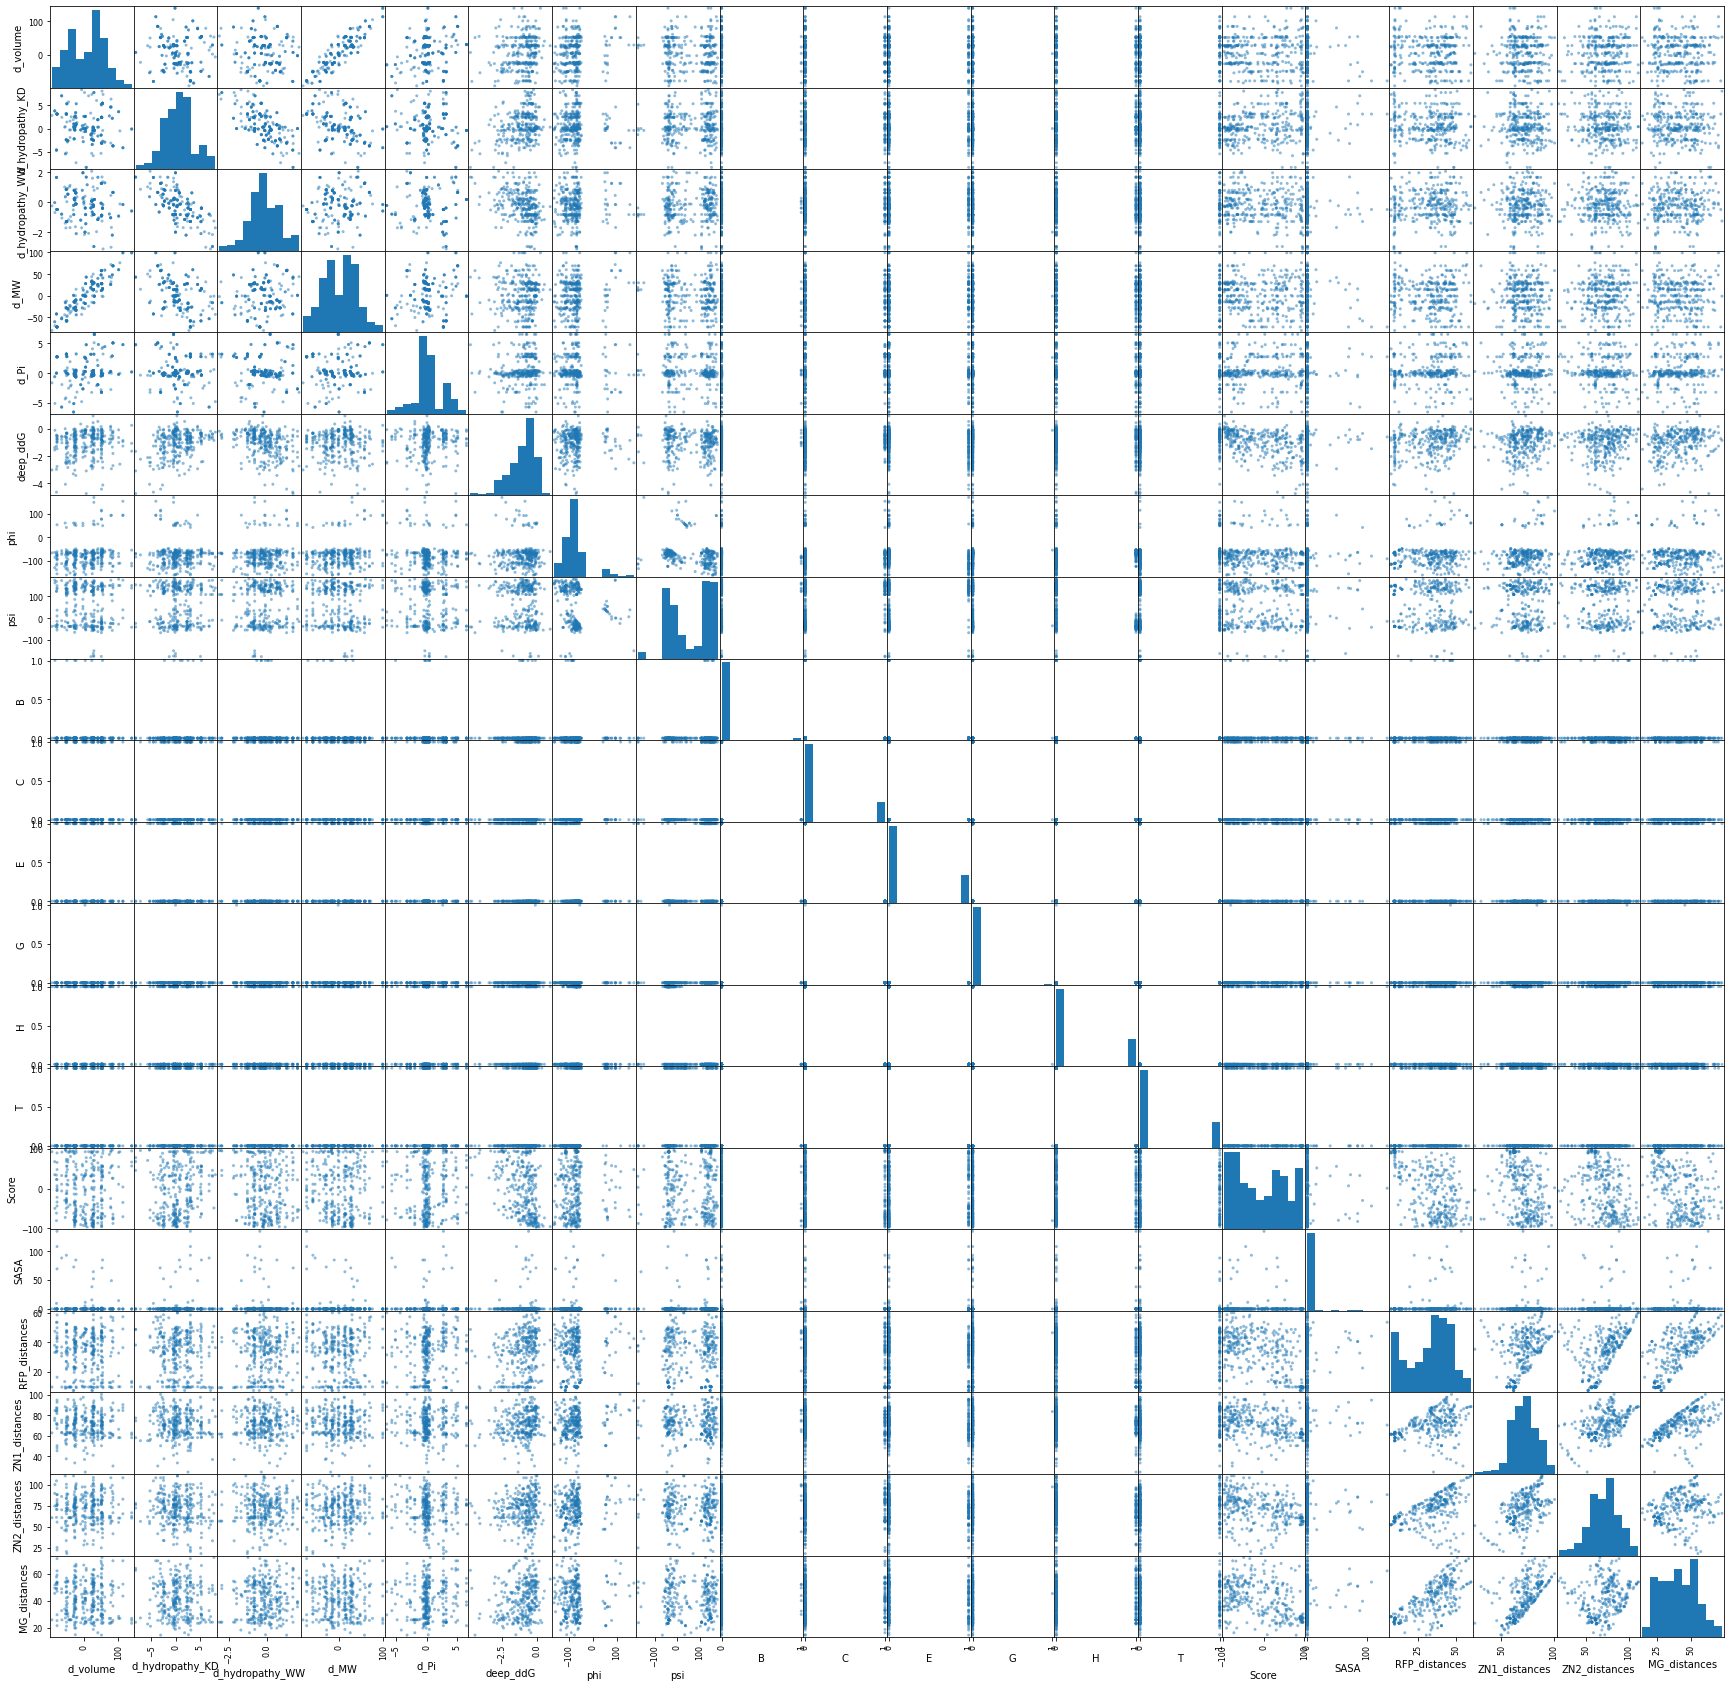

In [17]:
plot = pd.plotting.scatter_matrix(all_static[all_static.columns[:-1]], figsize=(30, 30))

To determine the effect confounding features have on model performance, we can generate two additional input dataframes that do not contain features with Pearson Correlation Coefficients over a certain threshold, here arbitrarily defined as 0.7. 

In [18]:
Dict = {}
for i in all_static.columns:
    for j in all_static.columns:
        if i != j:
            corr = scipy.stats.pearsonr(all_static[i], all_static[j])
            if corr[0] > 0.7:
                Dict[i, j] = corr[0]

print (Dict)
            

{('d_volume', 'd_MW'): 0.9089718961331299, ('d_MW', 'd_volume'): 0.9089718961331299, ('RFP_distances', 'MG_distances'): 0.7020978556334936, ('MG_distances', 'RFP_distances'): 0.7020978556334936}


The most confounded features are change in volume vs change in molecular weight, as well as distance to rifampicin and distance to the magnesium ion. This is somewhat unsurprising as a greater molecular weight would result from a larger residue, and the magnesium ion and rifampicin bind very close to one another near the active site. 

In [19]:
#create static feature and target df without confounding features by removing d_MW and MG_distances
static_no_conf = ML_df[['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_Pi', 'deep_ddG', 'phi', 'psi', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA', 'RFP_distances', 'ZN1_distances', 'ZN2_distances','BF']]
#create dynamic feature and target df without confounding features by removing d_MW and min_MG_distance
dynamic_no_conf = ML_df[['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_Pi','deep_ddG', 'B', 'C', 'E', 'G', 'H', 'T', 'Score', 'SASA','min_RFP_distance', 'min_ZN1_distance', 'min_ZN2_distance', 'mean_phi', 'mean_psi', 'BF' ]] 

We now have four dataframes to run models on and compare performance with:    
- all_static,   
- static_no_conf,    
- all_dynamic,    
- dynamic_no_conf.    

### The SearchModels() Class

To facilitate the efficient searching for the best performing models, a Python class called `SearchModels` was developed. Although it was developed independently of sbmlcore, it has been designed to search over input dataframes of the format above. Currently, it can only run four classification models; Logistic Regression, Linear SVC, a Single Decision Tree, and a Random Forest.

The class runs a workflow that is of a similar format and order to what would manually be constructued using ScikitLearn models in a notebook, and at its heart is a modular version of what is presented in Figure 3. 

The class is instantiated with a dictionary of dataframes to be searched over, with the key being the dataframe identifier. The user can either tune for average accuracy or average precision, and there is also an option to upsample the minority class of the target set by a user-defined number of times.  

To begin a search, one must call one of the public methods; `LogisticRegression()`, `LinearSVC()`, `DecisionTree()`, `RandomForest()`, or `AllModels()`. For each dataframe, this will construct a pipeline with a hyperparameter grid search, split the data 70:30, and run a stratified cross validation (80:20) grid search on the training set (leaving the test set untouched). 

If `upsample = True`, the smallest target class of the training set after the 80:20 split (in this case, the resistant phenotype) is upsampled by a given number of times. Upsampling before splitting results in also upsampling the test set, leading to almost total data leakage.

Depending on which metric is tuned for, either the average_accuracy or average_precision scores are averaged with the cross_validation score. The estimator with the highest mean score is fed into the `build_model()` method which retrains the model on the entire training set and is subsequently tested.

The class returns an object containing the identifier of the best performing input dataframe, the cross_validation score, average accuracy/precision from the grid search, the actual estimator, performance metrics including a confusion matrix of the final built model, as well as a precision-recall curve, ROC curve, and a feature importance plot (for the linear models, this is a feature coefficient plot).

For the purposes of this study, where we are focussing on model performance as a result of different types of features (rather than comparing different machine learning strategies), we, at least initially, call the `AllModels()` method and compare outputs regardless of which type of model was deemed optimal by the class. Furthermore, although the class is designed to find best performing input dataframe and output only that model, we want to actually analyse the performance resulting from each set of features and therefore will call the class independently for each feature set. 

Finally, while accuracy is of course important, clinically we are more concerned with minimising the number of false susceptible predictions, as this could potentially lead to the administration of drugs to which the bacilli are resistant. Therefore, we will tune the models to maximise average precision.

In [20]:
from ModelSearch import SearchModels

all_static_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500).AllModels()
static_no_conf_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500).AllModels()
all_dynamic_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500).AllModels()
dynamic_no_conf_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500).AllModels()

In [21]:
print ('all static: ', all_static_out['estimator'])
print ('confusion matrix: \n', all_static_out['built_model_performance']['confusion_matrix'], '\n')

print ('static no confounds: ', static_no_conf_out['estimator'])
print ('confusion matrix: \n', static_no_conf_out ['built_model_performance']['confusion_matrix'], '\n')

print ('all dynamic: ', all_dynamic_out['estimator'])
print ('confusion matrix: \n', all_dynamic_out['built_model_performance']['confusion_matrix'], '\n')

print ('dynamic no confounds: ', dynamic_no_conf_out['estimator'])
print ('confusion matrix: \n', dynamic_no_conf_out['built_model_performance']['confusion_matrix'], '\n')

#Confusion matrix = [[TN, FP], [FN, TP]]

all static:  Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=100000))])
confusion matrix: 
 [[10  6]
 [ 4 57]] 

static no confounds:  Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=100000))])
confusion matrix: 
 [[ 9  7]
 [ 3 58]] 

all dynamic:  Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=100000))])
confusion matrix: 
 [[10  6]
 [ 4 57]] 

dynamic no confounds:  Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=100000))])
confusion matrix: 
 [[ 9  7]
 [ 4 57]] 



The estimators above represent the best performing models for each input dataframe when tuning for average precision during the grid search. Unfortunately, however, all estimators misclassify a high proportion of resistant mutations as susceptible, resulting in low specificity. Furthermore, although it's not shown in this report, when the models were trained on dynamic features determined from the full 500-frame simulation, the Logistic Regression estimator managed to achieve extremeley high average precision on the grid search, but achieve zero specificity post retraining by misclassifying every resistant mutation of the test set, which is not particularly helpful. 

Furthermore, if one tunes for average accuracy rather than precision (not shown, but can be easily run), although the performance metrics are much improved, the preferred models are decision trees with a max depth of two, which is unlikely to scale. 

Dissecting the models to understand why these phenomena are occuring is difficult, however the issue likely arises from the high degree of imbalance in the lables, where only 15.6% of unique mutations are resistant:

In [22]:
ML_df['BF'].value_counts()

1    259
0     48
Name: BF, dtype: int64

Although different scaling strategies are incorporated into the grid search and pipeline for the linear models, this imbalance is extreme. A potential solution, therefore, is to upsample the resistant mutations of the training sets after splitting. 

To determine the best performing upsampling factor, the following iteration was run (output not shown due to size).

In [23]:
for i in range(1, 7):
    all_static_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=i).AllModels()
    #print ('\n all_static: ', i, ': \n', all_static_out['built_model_performance']['confusion_matrix'])
    static_no_conf_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=i).AllModels()
    #print ('\n static_no_conf: ', i, ': \n', static_no_conf_out['built_model_performance']['confusion_matrix'])
    all_dynamic_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=i).AllModels()
    #print ('\n all_dynamic: ', i, ': \n', all_dynamic_out['built_model_performance']['confusion_matrix'])
    dynamic_no_conf_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=i).AllModels()
    #print ('\n dynamic_no_conf: ', i, ': \n', dynamic_no_conf_out['built_model_performance']['confusion_matrix'])



The upsampling factor with the least misclassifications is 3. This is somewhat of an arbitrary value as it shifts with different random seed values for train-test splitting, but 3 doesn't seem an unreasonable factor to use (unsurpringly, the higher the factor, the more false negatives are predicted; so a balance has to be found between false negatives and false positives). This solves both the issue of Logistic Regression misclassifying every resistant mutation, and pushes the class away from using such shallow Decision Trees. 

The performance of each feature can now be compared:

In [24]:
all_static_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).AllModels()
static_no_conf_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).AllModels()
all_dynamic_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).AllModels()
dynamic_no_conf_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).AllModels()

In [25]:
print ('all static: ', all_static_out['estimator'])
print ('confusion matrix: \n', all_static_out['built_model_performance']['confusion_matrix'], '\n')

print ('static no confounds: ', static_no_conf_out['estimator'])
print ('confusion matrix: \n', static_no_conf_out ['built_model_performance']['confusion_matrix'], '\n')

print ('all dynamic: ', all_dynamic_out['estimator'])
print ('confusion matrix: \n', all_dynamic_out['built_model_performance']['confusion_matrix'], '\n')

print ('dynamic no confounds: ', dynamic_no_conf_out['estimator'])
print ('confusion matrix: \n', dynamic_no_conf_out['built_model_performance']['confusion_matrix'], '\n')

#Confusion matrix = [[TN, FP], [FN, TP]]

all static:  RandomForestClassifier(max_depth=8, n_estimators=30, n_jobs=-1,
                       random_state=500)
confusion matrix: 
 [[11  5]
 [ 5 56]] 

static no confounds:  Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', LinearSVC(C=100, dual=False, max_iter=100000))])
confusion matrix: 
 [[13  3]
 [ 7 54]] 

all dynamic:  RandomForestClassifier(max_depth=8, n_estimators=30, n_jobs=-1,
                       random_state=500)
confusion matrix: 
 [[11  5]
 [ 6 55]] 

dynamic no confounds:  Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', LinearSVC(C=10, dual=False, max_iter=100000))])
confusion matrix: 
 [[12  4]
 [ 9 52]] 



The best estimator is actually a LinearSVC model using the dataframe with static distances and angles, and without confounding features. 

In [26]:
best_model = static_no_conf_out

best_model['built_model_performance']

{'Precision': 0.9473684210526315,
 'Sensitivity': 0.8852459016393442,
 'Specificity': 0.8125,
 'FPR': 0.1875,
 'VME': 18.75,
 'ME': 11.475409836065573,
 'confusion_matrix': array([[13,  3],
        [ 7, 54]])}

The model has precision of 0.95, and sensitivity of 0.89, and a specificity of 0.81. This is compared to the best model prior to upsampling with corresponding values of 0.90, 0.93, and 0.625, respecitvely. This is a large improvement considering specificity is the metric we are trying to maximise by minimising the number of false positives.

Although an improvement, the very major error rate is still high, at 18.75.

The ROC curve and precision-Precision curve for this model:

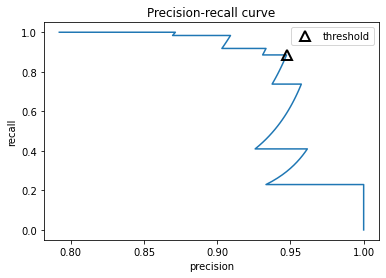

In [27]:
best_model = static_no_conf_out

best_model['built_model_PR_curve']


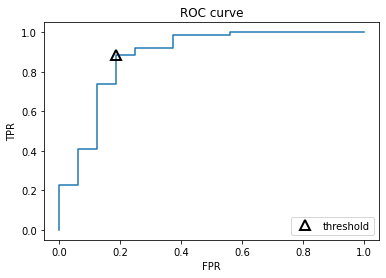

In [28]:
best_model['built_model_ROC_curve']

Neither the precision-recall curve nor the ROC curve are particularly impressive, and both curves demonstrate how fragile the model is - shifting the decision threshold boundary to increase precision could result in decreased recall *and* precision.

The feature coeficcient plot demonstrates a much higher coefficient for secondary structure motifs than we would have predicted; in fact hydrogen bonded turns (T) are weighted the most.

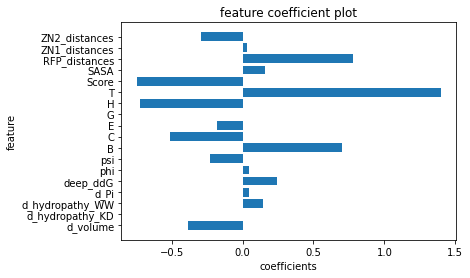

In [29]:
best_model['built_feature_importance']

This is of relevance as previous studies showed models tend to heavily prioritise distance based features, and in particular, distance from rifampicin due to the spatial clustering of resistant mutations. This can be observed with the random forest trained on all dynamic features, for example, where distance from rifampicin, instability prediction score, and distance from magnesium are deemed the most important features:

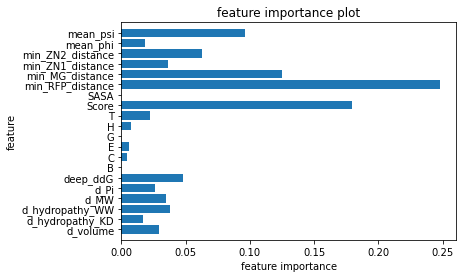

In [30]:
all_dynamic_out['built_feature_importance']

### Confounding features can decrease false positive rates

The confusion matrices of the models above do not suggest removing confounding features from the feature sets improves model performance. The total number of misclassifications for the static feature sets is the same with and without confounds, and model performance actually drops when confounding features are removed from the dynamic feature set. 

However, in both cases we are comparing a LinearSVC with a Random Forest. Therefore to investigate more rigorously, we should compare outputs of the same type of model. We accordingly compare Random Forests built on the different feature sets with an up upsampling factor of 3, but have kept some degree of inherent flexibilty by allowing the class to choose the best performing parameters for each model. 

In [31]:
all_static_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()
static_no_conf_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()
all_dynamic_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()
dynamic_no_conf_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()

In [32]:
def PlotFNFP(Dict, model):
    """Function to plot False positive and false negative rates"""
    X, FPs, FNs = [], [], []
    for k,v in Dict.items():
        X.append(k)
        FPs.append(v['FPR'])
        FNs.append(v['FNR'])
    X_axis = np.arange(len(X))

    plt.figure(figsize=(18, 6))
    plt.bar(X_axis-0.2, FPs, 0.4, label='FPR')
    plt.bar(X_axis+0.2, FNs, 0.4, label='FNR')
    plt.xticks(X_axis, X)
    plt.xlabel('Feature_Set')
    plt.ylabel('Misclassification Rate')
    plt.title('False positive and false negative rates for different feature sets for '+ model)
    plt.legend()
    plt.show()

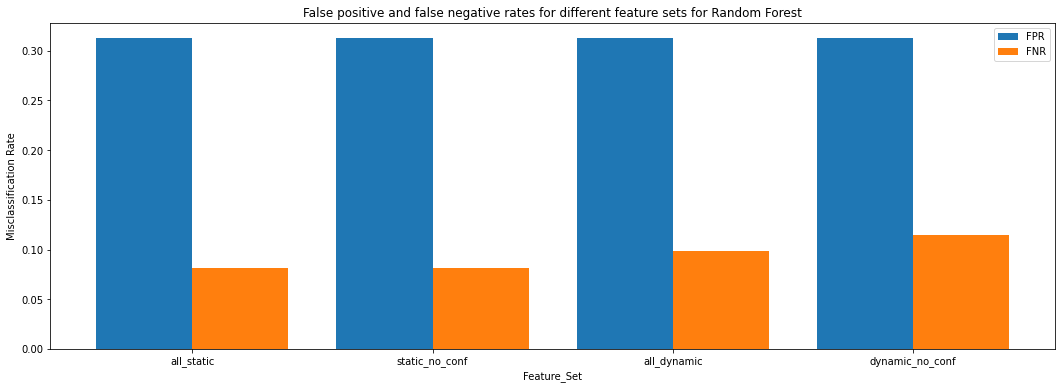

In [33]:
#build dictionary with FNR and FPR to input into plotting function

FNR_FPR = {}

all_static_perf = all_static_out['built_model_performance']
FNR_FPR['all_static'] = {'FPR': all_static_perf['FPR'], 'FNR': all_static_perf['ME']/100}
static_no_conf_perf = static_no_conf_out['built_model_performance']
FNR_FPR['static_no_conf'] = {'FPR': static_no_conf_perf['FPR'], 'FNR': static_no_conf_perf['ME']/100}
all_dynamic_perf = all_dynamic_out['built_model_performance']
FNR_FPR['all_dynamic'] = {'FPR': all_dynamic_perf['FPR'], 'FNR': all_dynamic_perf['ME']/100}
dynamic_no_conf_perf = dynamic_no_conf_out['built_model_performance']
FNR_FPR['dynamic_no_conf'] = {'FPR': dynamic_no_conf_perf['FPR'], 'FNR': dynamic_no_conf_perf['ME']/100}

#plot false negative rate and false positive rate
PlotFNFP(FNR_FPR, 'Random Forest')


Both Logistic Regression and Linear SVC models show no improvement with regard to false negative rate (results not shown), however the false positive rates do decrease substantially. In the case of static features, Random Forests and Decision Trees actually have a greater false negative rate when confounds are removed.

Therefore there is no clear, generalisable relationship between feature sets that contain confounding features, and those that do not. Interestingly the results may suggest Random Forests are more robust as performance remains remain unchanged.

### Dynamic features do not increase model performance

To compare models built on static features vs dynamic features, we can simplify the analysis by considering feature sets with or without confounding features seperately.

#### All Features

In [34]:
all_static_LR_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LogisticRegression()
all_dynamic_LR_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LogisticRegression()
all_static_SVC_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LinearSVC()
all_dynamic_SVC_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LinearSVC()
all_static_tree_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).DecisionTree()
all_dynamic_tree_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).DecisionTree()
all_static_forest_out = SearchModels({'all_static': all_static}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()
all_dynamic_forest_out = SearchModels({'all_dynamic': all_dynamic}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()

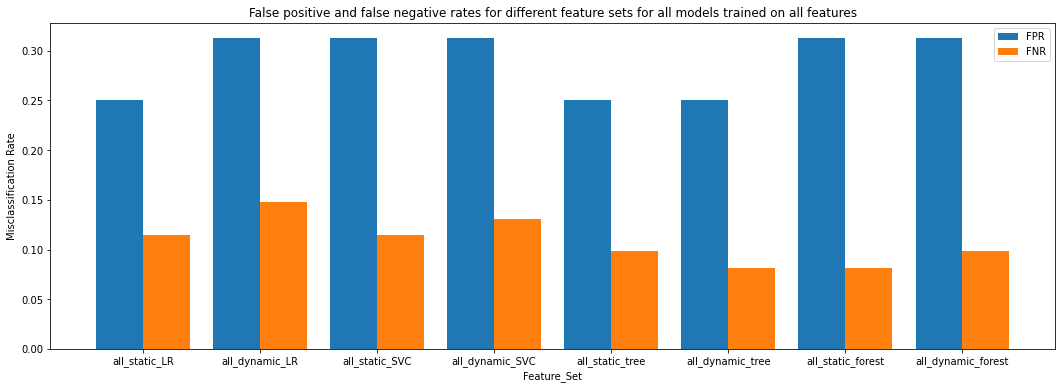

In [35]:
#build dictionary with FNR and FPR to input into plotting function

FNR_FPR = {}

all_static_LR= all_static_LR_out['built_model_performance']
FNR_FPR['all_static_LR'] = {'FPR': all_static_LR['FPR'], 'FNR': all_static_LR['ME']/100}

all_dynamic_LR= all_dynamic_LR_out['built_model_performance']
FNR_FPR['all_dynamic_LR'] = {'FPR': all_dynamic_LR['FPR'], 'FNR': all_dynamic_LR['ME']/100}

all_static_SVC= all_static_SVC_out['built_model_performance']
FNR_FPR['all_static_SVC'] = {'FPR': all_static_SVC['FPR'], 'FNR': all_static_SVC['ME']/100}

all_dynamic_SVC= all_dynamic_SVC_out['built_model_performance']
FNR_FPR['all_dynamic_SVC'] = {'FPR': all_dynamic_SVC['FPR'], 'FNR': all_dynamic_SVC['ME']/100}

all_static_tree= all_static_tree_out['built_model_performance']
FNR_FPR['all_static_tree'] = {'FPR': all_static_tree['FPR'], 'FNR': all_static_tree['ME']/100}

all_dynamic_tree= all_dynamic_tree_out['built_model_performance']
FNR_FPR['all_dynamic_tree'] = {'FPR': all_dynamic_tree['FPR'], 'FNR': all_dynamic_tree['ME']/100}

all_static_forest= all_static_forest_out['built_model_performance']
FNR_FPR['all_static_forest'] = {'FPR': all_static_forest['FPR'], 'FNR': all_static_forest['ME']/100}

all_dynamic_forest= all_dynamic_forest_out['built_model_performance']
FNR_FPR['all_dynamic_forest'] = {'FPR': all_dynamic_forest['FPR'], 'FNR': all_dynamic_forest['ME']/100}

#plot false negative rate and false positive rate
PlotFNFP(FNR_FPR, 'all models trained on all features')


On the whole, training on dynamic features increases either the number of false positives or the number of false negatives. In the case of decision trees, training on dynamic features marginally improves the false negative rate. 

All models demonstrate unacceptably high false positive rates.

#### No Confounding Features

In [36]:
static_no_conf_LR_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LogisticRegression()
dynamic_no_conf_LR_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LogisticRegression()
static_no_conf_SVC_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LinearSVC()
dynamic_no_conf_SVC_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).LinearSVC()
static_no_conf_tree_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).DecisionTree()
dynamic_no_conf_tree_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).DecisionTree()
static_no_conf_forest_out = SearchModels({'static_no_conf': static_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()
dynamic_no_conf_forest_out = SearchModels({'dynamic_no_conf': dynamic_no_conf}, 'precision', 'BF', 500, upsample=True, upsample_coef=3).RandomForest()

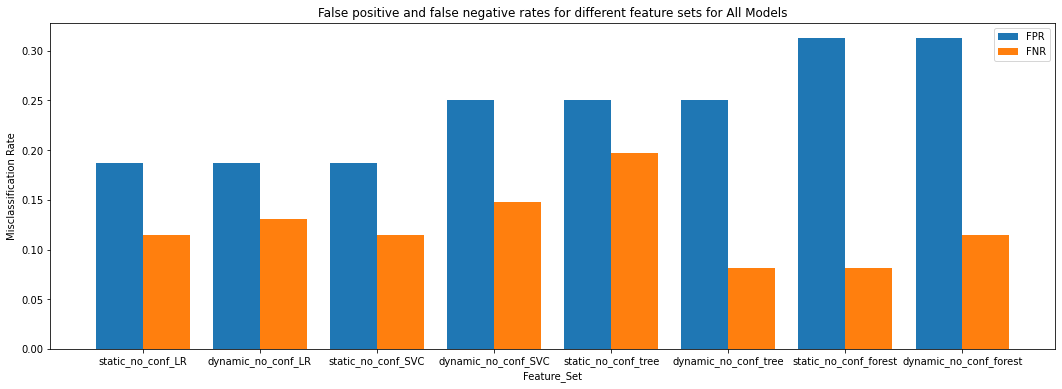

In [37]:
#build dictionary with FNR and FPR to input into plotting function

FNR_FPR = {}

static_no_conf_LR= static_no_conf_LR_out['built_model_performance']
FNR_FPR['static_no_conf_LR'] = {'FPR': static_no_conf_LR['FPR'], 'FNR': static_no_conf_LR['ME']/100}

dynamic_no_conf_LR= dynamic_no_conf_LR_out['built_model_performance']
FNR_FPR['dynamic_no_conf_LR'] = {'FPR': dynamic_no_conf_LR['FPR'], 'FNR': dynamic_no_conf_LR['ME']/100}

static_no_conf_SVC= static_no_conf_SVC_out['built_model_performance']
FNR_FPR['static_no_conf_SVC'] = {'FPR': static_no_conf_SVC['FPR'], 'FNR': static_no_conf_SVC['ME']/100}

dynamic_no_conf_SVC= dynamic_no_conf_SVC_out['built_model_performance']
FNR_FPR['dynamic_no_conf_SVC'] = {'FPR': dynamic_no_conf_SVC['FPR'], 'FNR': dynamic_no_conf_SVC['ME']/100}

static_no_conf_tree= static_no_conf_tree_out['built_model_performance']
FNR_FPR['static_no_conf_tree'] = {'FPR': static_no_conf_tree['FPR'], 'FNR': static_no_conf_tree['ME']/100}

dynamic_no_conf_tree= dynamic_no_conf_tree_out['built_model_performance']
FNR_FPR['dynamic_no_conf_tree'] = {'FPR': dynamic_no_conf_tree['FPR'], 'FNR': dynamic_no_conf_tree['ME']/100}

static_no_conf_forest= static_no_conf_forest_out['built_model_performance']
FNR_FPR['static_no_conf_forest'] = {'FPR': static_no_conf_forest['FPR'], 'FNR': static_no_conf_forest['ME']/100}

dynamic_no_conf_forest= dynamic_no_conf_forest_out['built_model_performance']
FNR_FPR['dynamic_no_conf_forest'] = {'FPR': dynamic_no_conf_forest['FPR'], 'FNR': dynamic_no_conf_forest['ME']/100}

#plot false negative rate and false positive rate
PlotFNFP(FNR_FPR, 'All Models')

The results show decreased model performance in terms of both FPR and FNR for the Logistic Regression and Linear SVC models when training on dynamic features rather than static. The random forest shown a slight increase in FNR for the dynamic feature set.

Interestingly,  the decision tree performance with regard to false negatives is boosted significantly, however the False positive rate remains high.

Therefore, with regard to RNA polymerase, including dynamic features in the dataset does not induce a clear performance boost.

# Discussion

In this study we compared the effect training machine learning models on static and dynamics features have on model performance, whether removing confounding features from the training set increases model performance, as well as if upsampling the minority class of the target set has any effect, with a particular focus on reducing the number of false positive misclassifications.

Initially, Logistic Regression, Linear SVC, Decision Trees, and Random Forests were trained across this entire search space to find the best performing model, which was in fact a Linear SVC trained on all static features. However, the other models tended to achieve a false positive rate of 100% by misclassifiying all resistant mutations when all 500 trajectory frames are used, which was a concern. We therefore upsampled by a factor of 3 to create an input target set of an R:S ratio of 144:259. Although still unbalanced, all models demonstrated greater and more stable performance post upsampling, and upsampling resistant mutations to a greater degree had a heavy cost with regard to false negative misclassifications. 

After upsampling, the best performing model was also a Linear SVC trained on a feature set with static features, but without confounds. Unfortunately, this model demonstrated a very unstable relationship between precision and recall, which dissallowed manually shifting the decision threshold boundary.  

On further investigation of the resulting performance from confounding features, some models showed decreased false positives rates, however the differences were relatively minor, and in fact most models showed no boost in performance at all. 

With regard to comparing models trained on static or dynamic features, there would appear to be no increase in performance from replacing distances and angles pulled down from the crytsal structure with minimum distances and mean phi/psi angles calculated from the simulation trajectories. It is important to note, however, that no great boost in performance was expected as the 'static models' already do a relatively good job of predicting susceptiblity, and the ability to readily calculate dynamic features was developed to increase performance of models trained on features from harder drug targets, such as EmbB where resistance conferring mutations are not clustered around the drug binding site. 

### A Clinical Interpretation

The best performing model outputted an accuracy of 87.0%, a sensitivity of 88.5%, and a specificity of 81.3%. The very major error rate is 18.75, and the major error rate is 11.5. Although these are relatively impressive scores for such a small and imbalanced data set, they are still significantly below the expected thresholds for clinical applicability (very major error < 1.5%, major error < 3%). 

In order to compare these results with current gold-standard rapid diagnsotic methods such as the Cepheid Xpert and Xpert Ultra devices, which determine resistance (as oppose to susceptibility), we have to adjust our definitions of true positives, true negatives, false positives, and false negatives. With respect to rifampicin-resistance prediction, our best performing model has a specificity of 88.5% and a sensitivity of 75.0%, which is compared to Xpert and Xpert Ultra's corresponding specificity and sensitivity of 98% and 95%, respectively. Therefore, there is still significant progress to be made before we achieve comparable metrics, however considering this is a preliminary study whose prediction outputs are a starting point for development and refinement, and that there are many data choice and machine learning strategies yet to be trialled, we have actually achieved rather impressive predictive performance. 


### Limitations of the models

There are, however, inherent limitations with the models. At a high level, only solo SNPs have been considered which limits the model's usefulenss clinically as the CRyPTIC datasets contain isolates with mutliple susceptible and resistant SNPs, as well as indels. Furthermore, we discarded all mutations that exist outside the *rpoB* gene. Although including these would further imbalance the dataset towards susceptible mutations, the models currently learn structural features within a very restricted spatial region.

In addition, the dataset is heavily unbalanced, with 48 resistant mutations vs 269 susceptible mutations. Although upsampling was succesful, this remains a fairly small training and target set. 

A further qualification is that RNAP has been considered in isolation, and we have therfore assumed that all resistant mutations do in fact cause resistance, and that there are no external factors (such as efflux pumps) that may alter the phenotype. 

With regard to comparing static and dynamic features, the simulations from which the dynamic features were calculated did attempt to reproduce physiological conditions. However, they were run for 50ns, which may not be a sufficient length of time to observe any significant conformational changes; the trajectory movements represents minor, local perturbations in residue coordinates. It's therefore possible the simulations were stuck in an energy minima. On the other hand, RNA polymerase is unlikely to undergo any significant conformational shifts without some form of binding event. Hence, it would be optimal to use simulations of conformational changes during functional activity.  

Furthermore, only 3 simulation repeats were run, which is the generally considered the minumum, and it's possible better performance could have been achieved with additional repeats.

In terms of the machine learning models, only Logistic Regression, Linear SVC, Decision Trees, and Random Forests were built. While it is important that the models are sufficiently simple in design to explain to clinicians, there are many other linear models that can be trialled. Fortunately, the `SearchModels()` class is desgined to allow for relatively easy addition of such models for future studies.

With regard to the PDB file, the resoluion is 3.8A, which although relatively low, is probably sufficient for this study. Furthermore, the CRyPTIC data contains a single-occurrence resistance-conferring mutation, S20I, in *rpoB* that exists within a short region of RNAP that has been attenuated from the crystal structure.

### Future Directions

Future directions of this study should focus on addressing the above limitations; the model performances may be lacking, but there is much yet to be trialled. The next logical step would be find strategies that increase the size of the dataset; perhaps by including additional RNAP genes with heavy upsampling, or to integrate frequency of mutation occurence into the feature set. 

Once the size of the dateset has increased, additional features should be integrated into sbmlcore, such as Root Mean Sqaure Fluctuation. Strucutral features have been focussed on, but genetic-derived data such as lineage could be integrated into the feature set. Furthermore, more models need to be trialled; a Linear SVC model outperforming a random forest on this dataset was unexpected, and so additional strategies must be explored. 

We should also train models that incorporate isolates with multiple resistant and suscepbitle mutations, potetianlly by applying the solo SNP-trained model to the wider CRyPTIC dataset. This would increase the the complexity of the model due to fitness-cost mutations, but the amount of data available would triple in comparison to that available for solo SNPs only. This would also increase the model's clinical applicability.

The aim of `sbmlcore` is to generate feature sets of any protein rapidly and with ease, and so models for each anti-TB compound will be developed and refined. 

### Conclusion and achknowledgements

This early-stage study has demonstrated the potential for machine-learning models trained on structural features to faciliate an early warning system for drug resistance, shorten the treatment, and reduce the cost of treating thousands of TB sufferers. 

In translational research, its particularly important to use good software practises, and this project has highlighted the major effect seemingly minor alterations can have on model performance and reliability. With clinical application in mind, there is no room for untested software, miscalculations, or data leakage. 

I would therefore like to thank SABS for teaching me the basics of sustainable and reliable software development. I would like to thank Dr Philip Fowler for teaching me rigorous software practises and for his welcome advice, support and encouragement, and also Dr Charlotte Lynch with whom I worked closely and who readily provided help and advice. 



# Bibliography

Brankin A Fowler P (2021) Predicting antibiotic resistance in complex portein targets using alchemical free energy methods. ChemRxiv. https://doi.org/10.26434/chemrxiv-2021-shfgp<a id='Brankin2021a'></a>

Brankin A, Malone KM, Barilar I, Battaglia S, Pires Brandao A, Maurizio Cabibbe A, Carter J, Maria D, Claxton P, Clifton DA, et al (2021) A data compendium of Mycobacterium tuberculosis antibiotic resistance. PLoS Biology. https://doi.org/10.1101/2021.09.14.460274 <a id='Brankin2021b'></a>

Boehme CC, Nabeta P, Hillemann D, Nicol MP, Shenai S, Krapp F, Allen J, Tahirli R, Blakemore R, Rustomjee R, et al (2010) Rapid Molecular Detection of Tuberculosis and Rifampin Resistance. New England Journal of Medicine 363: 1005–1015<a id='Boehme2010'></a>

Bromberg Y & Rost B (2007) SNAP: predict effect of non-synonymous polymorphisms on function. Nucleic Acids Research 35: 3823–3835<a id=Bromberg2007></a>

Campbell EA, Korzheva N, Mustaev A, Murakami K, Nair S, Goldfarb A & Darst SA (2001) Structural mechanism for rifampicin inhibition of bacterial RNA polymerase. Cell 104: 901–912<a id='Campbell2001'></a>

Cao H, Wang J, He L, Qi Y & Zhang JZ (2019) DeepDDG: Predicting the Stability Change of Protein Point Mutations Using Neural Networks. Journal of Chemical Information and Modeling 59: 1508–1514<a id='Cao2019'></a>

CRyPTIC (2021) A generalisable approach to drug susceptibility prediction for M. tuberculosis using machine learning and whole-genome sequencing. bioRxiv. https://doi.org/10.1101/2021.09.14.458035<a id='CRyPTIC2021'></a>     

CRyPTIC Consortium (2022) Epidemiological cutoff values for a 96-well broth microdilution plate for high-throughput research antibiotic susceptibility testing of M. tuberculosis. European Respiratory Journal: 2200239<a id='CRyPTIC2022'></a>

Falzon D, Jaramillo E, Schünemann HJ, Arentz M, Bauer M, Bayona J, Blanc L, Caminero JA, Daley CL, Duncombe C, et al (2011) WHO guidelines for the programmatic management of drug-resistant tuberculosis: 2011 update. European Respiratory Journal 38: 516–528<a id='Falzon2011'></a>

Feuerriegel S, Schleusener V, Beckert P, Kohl TA, Miotto P, Cirillo DM, Cabibbe AM, Niemann S & Fellenberg K (2015) PhyResSE: A web tool delineating Mycobacterium tuberculosis antibiotic resistance and lineage from whole-genome sequencing data. Journal of Clinical Microbiology 53: 1908–1914<a id='Feuerriegel2015'></a>

Fowler PW, Cruz ALG, Hoosdally SJ, Jarrett L, Borroni E, Chiacchiaretta M, Rathod P, Lehmann S, Molodtsov N, Walker TM, et al (2018) Automated detection of bacterial growth on 96-well plates for high-throughput drug susceptibility testing of mycobacterium tuberculosis. Microbiology (United Kingdom) 164: 1522–1530<a id='Fowler2018'></a>

Hecht M, Bromberg Y & Rost B (2013) News from the Protein Mutability Landscape. Journal of Molecular Biology 425: 3937–3948<a id='Hecht2013'></a>

Hecht M, Bromberg Y & Rost B (2015) Better prediction of functional effects for sequence variants. BMC Genomics 16: S1<a id='Hecht2015'></a>

Heinig M & Frishman D (2004) STRIDE: a Web server for secondary structure assignment from known atomic coordinates of proteins. Nucleic Acids Res. 2004 Jul 1;32(Web Server issue):W500-2. doi: 10.1093/nar/gkh429<a id=Heinig2004></a>

Johnsen CH, Clausen PTLC, Aarestrup FM & Lund O (2019) Improved resistance prediction in Mycobacterium tuberculosis by better handling of insertions and deletions, premature stop codons, and filtering of non-informative sites. Frontiers in Microbiology 10: 1–10<a id='Johnsen2019'></a>

Kyte J & Doolittle RF (1982) A simple method for displaying the hydropathic character of a protein. Journal of Molecular Biology 157: 105–132<a id=Kyte1982></a>

Lawn SD & Nicol MP (2011) Xpert® MTB/RIF assay: Development, evaluation and implementation of a new rapid molecular diagnostic for tuberculosis and rifampicin resistance. Future Microbiology 6: 1067–1082<a id='Lawn2011'></a>

Lide DR (1991) CRC handbook of chemistry and physics 72nd ed. Boca Raton, Fl: CRC Press<a id=Lide1991></a>

Lin W, Mandal S, Degen D, Liu Y, Ebright YW, Li S, Feng Y, Zhang Y, Mandal S, Jiang Y, et al (2017) Structural Basis of Mycobacterium tuberculosis Transcription and Transcription Inhibition. Molecular Cell 66: 169-179.e8<a id=Lin2017></a>

McClure WR & Cech CL (1978) On the mechanism of rifampicin inhibition of RNA synthesis. Journal of Biological Chemistry 253: 8949–8956<a id='McClure1978'></a>

Mitternacht S (2016) FreeSASA: An open source C library for solvent accessible surface area calculations [version 1; peer review: 2 approved]. F1000Res 5<a id='Mitternacht2016'></a>

Mvelase NR, Pillay M, Sibanda W, Ngozo JN, Brust JCM & Mlisana KP (2019) RpoB Mutations Causing Discordant Rifampicin Susceptibility in Mycobacterium tuberculosis: Retrospective analysis of prevalence, phenotypic, genotypic, and treatment outcomes. Open Forum Infectious Diseases 6 <a id='Mvelase2019'></a>

Nahid P, Dorman SE, Alipanah N, Barry PM, Brozek JL, Cattamanchi A, Chaisson LH, Chaisson RE, Daley CL, Grzemska M, et al (2016) Official American Thoracic Society/Centers for Disease Control and Prevention/Infectious Diseases Society of America Clinical Practice Guidelines: Treatment of Drug-Susceptible Tuberculosis. Clinical Infectious Diseases 63: 853–867 doi:10.1093/cid/ciw566<a id='Nahid2016'></a>

Nicol MP, Workman L, Isaacs W, Munro J, Black F, Eley B, Boehme CC, Zemanay W & Zar HJ (2011) Accuracy of the Xpert MTB/RIF test for the diagnosis of pulmonary tuberculosis in children admitted to hospital in Cape Town, South Africa: A descriptive study. The Lancet Infectious Diseases 11: 819–824<a id='Nicol2011'></a>

O’Neil J (2014) Review on Antibiotic resisitance. Antimicrobial Resistance : Tackling a crisis for the health and wealth of nations. Health and Wealth Nations: 1–16<a id='ONeil2014'></a>

O’Neil J (2016) Tackling drug-resistant infections globally: Final Report and Recommendations. Wellcome Collection: 80<a id='ONeil2016'></a>

Piatek AS, Telenti A, Murray MR, El-Hajj H, Jacobs WRJ, Kramer FR & Alland D (2000) Genotypic analysis of Mycobacterium tuberculosis in two distinct populations using  molecular beacons: implications for rapid susceptibility testing. Antimicrob Agents Chemother 44: 103–110<a id='Piatek2000'></a>

Piatek AS, Tyagi S, Pol AC, Telenti A, Miller LP, Kramer FR & Alland D (1998) Molecular beacon sequence analysis for detecting drug resistance in Mycobacterium  tuberculosis. Nat Biotechnol 16: 359–363<a id='Piatek1998'></a>

Rancoita PM v., Cugnata F, Gibertoni Cruz AL, Borroni E, Hoosdally SJ, Walker TM, Grazian C, Davies TJ, Peto TEA, Crook DW, et al (2018) Validating a 14-Drug Microtiter Plate Containing Bedaquiline and Delamanid for Large-Scale Research Susceptibility Testing of Mycobacterium tuberculosis. Antimicrobial Agents and Chemotherapy 62<a id='Rancoita2018'></a>

Ruth M. Saecker, M. Thomas Record Jr. PL deHaseth (2011) Mechanism of Bacterial Transcription Initiation: RNA Polymerase - Promoter Binding, Isomerization to InitiationCompetent Open Complexes, and Initiation of RNA Synthesis. Journal of Molecular Biology 412: 754–71<a id='Saecker2011'></a>

Sandgren A, Strong M, Muthukrishnan P, Weiner BK, Church GM & Murray MB (2009) Tuberculosis Drug Resistance Mutation Database. PLOS Medicine 6: e1000002<a id='Sandgren2009'></a>

Seung KJ, Keshavjee S & Rich ML (2015) Multidrug-Resistant Tuberculosis and Extensively Drug-Resistant Tuberculosis. Cold Spring Harbor Perspectives in Medicine 5: a017863<a id='Seung2015'></a>

Sohn H, Aero AD, Menzies D, Behr M, Schwartzman K, Alvarez GG, Dan A, McIntosh F, Pai M & Denkinger CM (2014) Xpert MTB/RIF testing in a low tuberculosis incidence, high-resource setting:  limitations in accuracy and clinical impact. Clinical infectious diseases : an official publication of the Infectious Diseases  Society of America 58: 970–976<a id='Sohn2014'></a>

Steingart KR, Schiller I, Horne DJ, Pai M, Boehme CC & Dendukuri N (2014) Xpert® MTB/RIF assay for pulmonary tuberculosis and rifampicin resistance in adults. Cochrane Database of Systematic Reviews 2014: 1–3<a id='Steingart2014'></a>

Stone EA & Sidow A (2005) Physiochemical constraint violation by missense substitutions mediates impairment of protein function and disease severity. Genome Research 15: 978–986<a id='Stone2005'></a>

Tyagi S, Bratu DP & Kramer FR (1998) Multicolor molecular beacons for allele discrimination. Nature Biotechnology 16: 49–53<a id='Tyagi1998'></a>

Tyagi S & Kramer FR (1996) Molecular beacons: probes that fluoresce upon hybridization. Nat Biotechnol 14: 303–308<a id='Tyagi1996'></a>

Walker TM, Fowler PW, Knaggs J, Hunt M, Peto TE, Walker AS, Crook DW, Walker TM, Miotto P, Cirillo DM, et al (2022) The 2021 WHO catalogue of Mycobacterium tuberculosis complex mutations associated with drug resistance: a genotypic analysis. The Lancet Microbe 3: e265–e273<a id='Walker2022'></a>

WHO (2013) Xpert MTB/RIF assay for the diagnosis of pulmonary and extrapulmonary TB in adults and children: Policy update. World Health Organisation: 1–79<a id='WHO2013'></a>

WHO (2014) The end TB strategy global strategy and targets for tuberculosis prevention, care and control after 2015<a id='WHO2014'></a>

WHO (2020a) Global tuberculosis report 2020. World Health Organization<a id='WHO2020a'></a>

WHO (2020b) WHO consolidated guidelines on tuberculosis. Module 3: Diagnosis - Rapid diagnostics for tuberculosis detection<a id='WHO2020b'></a>

WHO (2021) Global Tuberculosis Report 2021<a id='WHO2021'></a>

WHO (2022a) Tuberculosis surveillance and monitoring in Europe.<a id='WHO2022a'></a>

WHO (2022b) Rapid communication: Key changes to the treatment of drug-resistant tuberculosis<a id='WHO2022b'></a>

Wimley WC & White SH (1996) Experimentally determined hydrophobicity scale for proteins at membrane interfaces. Nature Structural & Molecular Biology 3: 842–848<a id=Wimley1996></a>

Witzany C, Bonhoeffer S & Rolff J (2020) Is antimicrobial resistance evolution accelerating? PLOS Pathogens 16: e1008905<a id='Witzany2020'></a>

Yu Zhang, Yu Feng, Sujoy Chatterjee, Steve Tuske, Mary X. Ho, Eddy Arnold RHE (2012) Structural Basis of Transcription Initiation. Science (1979) 338: 1076–1081<a id='Zhang2012'></a>

Zamyatnin AA (1972) Protein volume in solution. Prog Biophys Mol Biol 24: 107–123<a id='Zamyatnin1972'></a>

Zetola NM, Shin SS, Tumedi KA, Moeti K, Ncube R, Nicol M, Collman RG, Klausner JD & Modongoa C (2014) Mixed Mycobacterium tuberculosis complex infections and false-negative results for rifampin resistance by genexpert MTB/RIF are associated with poor clinical outcomes. Journal of Clinical Microbiology 52: 2422–2429<a id='Zetola2014'></a>


[CRyPTIC, 2021](#CRyPTIC,2021)